In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from tensorflow import keras
import sys
import os
import time

print(sys.version_info)
for lib in (tf, pd, np, mpl, sklearn, keras):
    print(lib.__name__, lib.__version__)


sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
tensorflow 2.0.1
pandas 1.0.1
numpy 1.18.1
matplotlib 3.1.3
sklearn 0.22.1
tensorflow_core.keras 2.2.4-tf


In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [7]:
from sklearn.model_selection import train_test_split
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(11610, 8)
(3870, 8)
(5160, 8)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [11]:
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(15, activation="relu")(input_deep)
hidden2 = keras.layers.Dense(15, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_wide, input_deep], outputs = output)

model.compile(loss="mse", optimizer="sgd")

callbacks = [
    keras.callbacks.EarlyStopping(patience=5, min_delta=3e-2)
]

x_train_wide_scaled = x_train_scaled[:, :5]
x_train_deep_scaled = x_train_scaled[:,2:]
x_valid_wide_scaled = x_valid_scaled[:, :5]
x_valid_deep_scaled = x_valid_scaled[:, 2:]
x_test_wide_scaled = x_test_scaled[:, :5]
x_test_deep_scaled = x_test_scaled[:, 2:]
history = model.fit([x_train_wide_scaled, x_train_deep_scaled], y_train, epochs=25,
                    validation_data=([x_valid_wide_scaled, x_valid_deep_scaled], y_valid), callbacks = callbacks)


Train on 11610 samples, validate on 3870 samples
Epoch 1/25
11610/11610 [==============================] - 1s 95us/sample - loss: 1.0570 - val_loss: 0.6254
Epoch 2/25
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5348 - val_loss: 0.5318
Epoch 3/25
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4886 - val_loss: 0.4996
Epoch 4/25
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4619 - val_loss: 0.4896
Epoch 5/25
11610/11610 [==============================] - 0s 35us/sample - loss: 0.4421 - val_loss: 0.5332
Epoch 6/25
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4402 - val_loss: 0.4469
Epoch 7/25
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4253 - val_loss: 0.4433
Epoch 8/25
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4165 - val_loss: 0.4326
Epoch 9/25
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4264 - val_l

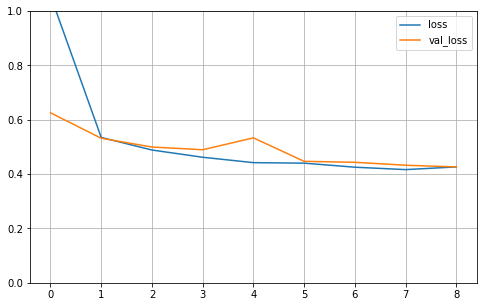

In [13]:
def print_learning_curves(history):
    pd.DataFrame(history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1.0)
    plt.show()
    
print_learning_curves(history.history)
    

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 66us/sample - loss: 1.6042 - val_loss: 5.0632
Epoch 2/30
11610/11610 [==============================] - 0s 35us/sample - loss: 33.7125 - val_loss: 146.7551
Epoch 3/30
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 4/30
11610/11610 [==============================] - 0s 41us/sample - loss: nan - val_loss: nan
Epoch 5/30
11610/11610 [==============================] - 0s 36us/sample - loss: nan - val_loss: nan
Epoch 6/30
11610/11610 [==============================] - 0s 37us/sample - loss: nan - val_loss: nan


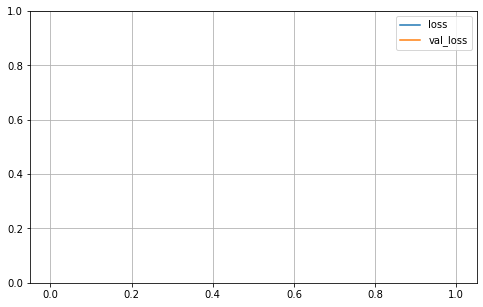

In [20]:
class WideDeepModel(keras.models.Model):
    def __init__(self):
        super(WideDeepModel, self).__init__()
        self.hidden_layer1 = keras.layers.Dense(15, activation="relu")
        self.hidden_layer2 = keras.layers.Dense(15, activation="relu")
        self.output_layer = keras.layers.Dense(1)
        
    def call(self, input):
        hidden1 = self.hidden_layer1(input)
        hidden2 = self.hidden_layer2(hidden1)
        concat = keras.layers.concatenate([input, hidden2])
        output = self.output_layer(concat)
        return output
    
#model = keras.models.Sequential([WideDeepModel(),])
#model.build(input_shape=(None, 8))
model = WideDeepModel()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks=[ 
    keras.callbacks.EarlyStopping(patience=5, min_delta=5e-2)
]
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid), epochs=30, callbacks=callbacks)
print_learning_curves(history.history)